In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
titanic = pd.read_csv('datasets/titanic.csv')

<AxesSubplot:xlabel='Fare'>

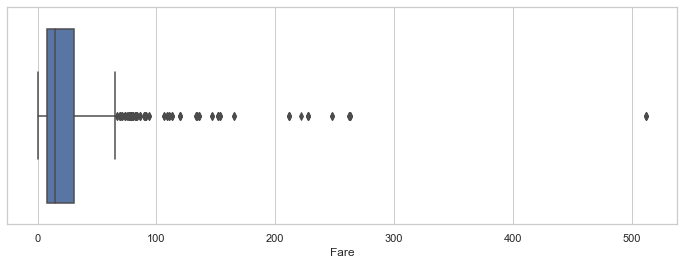

In [126]:
# 이상값 -> 대부분의 관찰값과 다른 이상값(outlier)
# 박스플롯 시각화 - 동일한 사이즈의 4개 그룹으로 나누는 기준점인 사분위수를 사용하여 데이터의 모양을 표시
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,4))
sns.boxplot(x=titanic.Fare)

<AxesSubplot:xlabel='Age'>

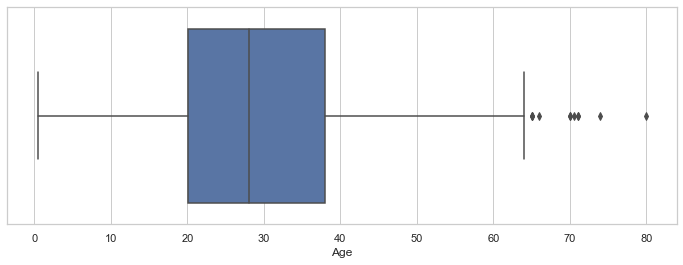

In [127]:
plt.figure(figsize=(12,4))
sns.boxplot(x=titanic.Age)

In [128]:
# IQR 기법으로 이상값 확인하기
def outlier_iqr(data, column):
    # lower(하한), upper(상한) 글로벌 변수 선어
    global lower, upper
    
    q1, q3 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)   # 4분위수 기준 지정
    iqr = q3 - q1    # IQR 계산
    cut_off = iqr * 1.5     # outlier cutoff(기준점) 계산
    lower, upper = q1 - cut_off, q3 + cut_off    # lower, upper 구분값 구하기
    print(f'IQR은 {iqr}이다.')
    print(f'lower의 기준값은 {lower}이다.')
    print(f'upper의 기준값은 {upper}이다.')
    # 1, 4사분위에 속해 있는 데이터 각각 저장하기
    data1 = data[data[column]>upper]
    data2 = data[data[column]<lower]
    # 이상값 총 개수
    return print(f'총 이상값 개수는 {data1.shape[0]+data2.shape[0]}이다.')
    

In [129]:
outlier_iqr(titanic, 'Fare')

IQR은 23.0896이다.
lower의 기준값은 -26.724이다.
upper의 기준값은 65.6344이다.
총 이상값 개수는 116이다.


C:\Users\user\anaconda3\envs\env_name\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


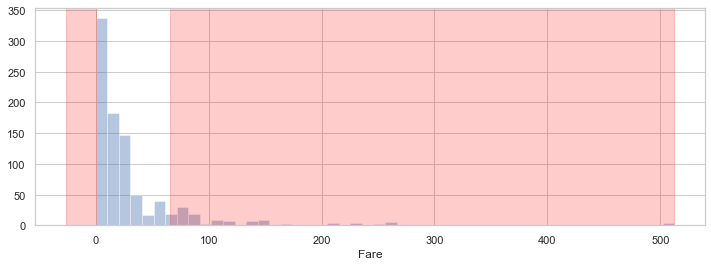

In [130]:
# 시본 distplot으로 히스토그램
plt.figure(figsize=(12,4))
sns.distplot(titanic.Fare, bins=50, kde=False)

# 히스토그램 위에 맷플롯립 axvspan 도구를 이용해 이상값 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=titanic.Fare.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=titanic.Fare.max(), alpha=0.2, color='red')
plt.show();

In [131]:
# 이상값을 제외한 정상값 데이터 필터링
titanic_no_outlier = titanic[(titanic['Fare']<upper) & (titanic['Fare']>lower)]
titanic_no_outlier.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [132]:
len(titanic_no_outlier)

775

In [133]:
# 이상값 선택하는 방법, 정상값 ~(틸데) 기호 
outlier = titanic[~(titanic['Fare']<upper) & (titanic['Fare']>lower)]
outlier.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [134]:
# 이상값의 인덱스 저장
outlier_index = [outlier.index]
outlier_index

[Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
             ...
             792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
            dtype='int64', length=116)]

In [135]:
# iloc[로우의 위치, 컬럼의 위치]
titanic.iloc[outlier_index, 9] = titanic['Fare'].mean()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,32.204208,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,NaN,S


In [136]:
# 필요없는 변수는 삭제
titanic.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,32.204208,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,S


In [137]:
# dtype('O') - object-dtype
titanic.Name.dtype

dtype('O')

In [138]:
# object 변수를 string으로 변환
titanic.Name = titanic.Name.astype("string")
titanic.Name.dtype

string[python]

In [139]:
titanic.Name.str.split()

0                           [Braund,, Mr., Owen, Harris]
1      [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                             [Heikkinen,, Miss., Laina]
3      [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                          [Allen,, Mr., William, Henry]
                             ...                        
886                            [Montvila,, Rev., Juozas]
887                    [Graham,, Miss., Margaret, Edith]
888       [Johnston,, Miss., Catherine, Helen, "Carrie"]
889                           [Behr,, Mr., Karl, Howell]
890                              [Dooley,, Mr., Patrick]
Name: Name, Length: 891, dtype: object

In [140]:
titanic.Name.str.split(pat=',')

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [141]:
# expand - 문자가 분리되는만큼 개별 컬럼 생성(가장 긴 문자 기준으로 나머지 데이터는 빈셀)
titanic.Name.str.split(expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"Braund,",Mr.,Owen,Harris,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,"Cumings,",Mrs.,John,Bradley,(Florence,Briggs,Thayer),<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,"Heikkinen,",Miss.,Laina,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,"Futrelle,",Mrs.,Jacques,Heath,(Lily,May,Peel),<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,"Allen,",Mr.,William,Henry,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,"Montvila,",Rev.,Juozas,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
887,"Graham,",Miss.,Margaret,Edith,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
888,"Johnston,",Miss.,Catherine,Helen,"""Carrie""",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
889,"Behr,",Mr.,Karl,Howell,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [115]:
# 호칭 담기
titanic.Name.str.split().str[1]

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: Name, Length: 891, dtype: object

In [142]:
titanic['title'] = titanic.Name.str.split().str[1]

In [143]:
titanic.title.value_counts().head()

Mr.        502
Miss.      179
Mrs.       121
Master.     40
Dr.          7
Name: title, dtype: int64

In [148]:
titanic.title.str.replace('.', '', regex=False)
titanic.title.str.replace(',', '', regex=False)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: title, Length: 891, dtype: object

In [149]:
titanic['title'] = titanic.title.str.replace('.', '', regex=False)
titanic['title'] = titanic.title.str.replace(',', '', regex=False)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,32.204208,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,S,Mr


In [150]:
titanic.title.value_counts()

Mr             502
Miss           179
Mrs            121
Master          40
Dr               7
Rev              6
y                4
Planke           3
Impe             3
Gordon           2
Col              2
Mlle             2
Major            2
Melkebeke        1
Jonkheer         1
Shawah           1
the              1
Velde            1
Capt             1
Messemaeker      1
Carlo            1
Ms               1
Mme              1
Steen            1
Mulder           1
Pelsmaeker       1
Walle            1
der              1
Billiard         1
Don              1
Cruyssen         1
Name: title, dtype: int64

In [151]:
titanic['title'] = titanic['title'].str.replace('Mlle', 'Miss', regex=False)
titanic['title'] = titanic['title'].str.replace('Ms', 'Miss', regex=False)
titanic['title'] = titanic['title'].str.replace('Mme', 'Mrs', regex=False)

In [152]:
rare_name = ['Dr', 'Rev', 'y', 'Impe', 'Planke', 'Major', 'Gordon', 'Col', 'Jonkheer', 'the', 'Billiard', 'Don', 'Shawah', 
             'Velde', 'Capt', 'Cruyssen', 'Mulder', 'Melkebeke', 'Steen', 'Walle', 'Messemaeker', 'der', 'Pelsmaeker', 'Carlo']
titanic['title'] = titanic['title'].replace(rare_name, 'Rare', regex=False)

In [153]:
titanic.title.value_counts()

Mr        502
Miss      182
Mrs       122
Rare       45
Master     40
Name: title, dtype: int64

In [154]:
titanic[titanic['Name'].str.contains('Mr')].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,32.204208,C,Mrs
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,S,Mr
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458300,Q,Mr


In [155]:
# 정규 표현식을 이용하여 데이터 찾기1 - 판다스 extract 함수 
# [A-Za-z]+)\. - 호칭을 의미하는 문자가 점 왼쪽에 위치하는 패턴
titanic['title'] = titanic.Name.str.extract(r'([A-Za-z]+)\.', expand=False)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,32.204208,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,S,Mr


In [157]:
# 정규 표현식을 이용하여 데이터 찾기2 - count() 함수 
# 이름이 Z로 시작하는 승객의 데이터
titanic[titanic.Name.str.count(r'(^Z.*)') == 1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
111,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,C,Miss
240,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C,Miss
422,0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,S,Mr


In [158]:
titanic.Name.str.count(r'(^Z.*)').sum()

3

In [159]:
# 정규 표현식을 이용하여 데이터 찾기3 - 판다스 match 함수
# 이름이 Y로 시작하는 승객의 데이터
titanic[titanic['Name'].str.match(r'^Y.*') == True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
199,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.000000,S,Miss
203,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.225000,C,Mr
325,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,32.204208,C,Miss
354,0,3,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.225000,C,Mr
495,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.458300,C,Mr
620,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.454200,C,Mr
830,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.454200,C,Mrs


In [160]:
# 공백을 포함한 모든 문자 수
titanic['Name'].str.count('')

0      24
1      52
2      23
3      45
4      25
       ..
886    22
887    29
888    41
889    22
890    20
Name: Name, Length: 891, dtype: Int64

In [161]:
# 단어 수 세기
titanic['Name'].str.count(' ') +1

0      4
1      7
2      3
3      7
4      4
      ..
886    3
887    4
888    5
889    4
890    3
Name: Name, Length: 891, dtype: Int64

In [162]:
# 특정 문자 수 세기
titanic['Name'].str.count('a')

0      2
1      2
2      2
3      3
4      1
      ..
886    2
887    4
888    2
889    1
890    1
Name: Name, Length: 891, dtype: Int64